In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
current_map = "idc_regular"
patient = [file for file in os.listdir(current_map)]
print(len(patient))

['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268']


In [3]:
def get_x_coord(path_name):
    structure = path_name.split("_")
    x_name = structure[2]
    return x_name[1:]

def get_y_coord(path_name):
    structure = path_name.split("_")
    x_name = structure[3]
    return x_name[1:]

In [4]:
amount_negative = 0
amount_positive = 0
perc_positive = 0
patient_positive = 0
patient_negative = 0
all_average = []
x_coord = {}
y_coord = {}
enough_neg = []
enough_pos = []

for sub in patient:
    path = f"{current_map}/{sub}"
    for negative in os.listdir(f"{path}/0"):
        amount_negative += 1
        patient_negative += 1
    for positive in os.listdir(f"{path}/1"):
        amount_positive += 1
        patient_positive += 1
        x = get_x_coord(positive)
        y = get_y_coord(positive)
        if not x in x_coord:
            x_coord[x] = 1
        else: x_coord[x] += 1
        if not y in y_coord:
            y_coord[y] = 1
        else: y_coord[y] += 1
    all_average.append(patient_positive / (patient_positive + patient_negative))
    if patient_negative < 11: enough_neg.append(sub)
    if patient_positive < 11: enough_pos.append(sub)
    patient_negative = 0
    patient_positive = 0
    
perc_positive = sum(all_average) / len(all_average)

In [5]:
print(perc_positive)
# print(all_average[10])
print(amount_positive)
print(amount_negative)
print(enough_neg)
print(enough_pos)

0.2197201496869915
[0.12750455373406194, 0.08962264150943396, 0.33455882352941174, 0.25, 0.32755905511811023, 0.2037735849056604, 0.021160409556313993, 0.2800620636152056, 0.08668730650154799, 0.4172661870503597, 0.48754152823920266, 0.010905642484589853]
2482
9340
{'501': 18, '551': 23, '601': 27, '651': 29, '701': 37, '751': 58, '801': 63, '851': 70, '901': 70, '1601': 93, '1651': 107, '1701': 111, '1751': 107, '1801': 96, '1851': 85, '1001': 73, '1051': 77, '1101': 81, '1151': 81, '151': 2, '201': 3, '251': 4, '301': 5, '351': 9, '401': 12, '451': 14, '951': 69, '1901': 74, '1951': 65, '2001': 57, '2051': 51, '2101': 44, '2151': 40, '1501': 91, '1551': 89, '1201': 79, '1251': 81, '1301': 80, '1351': 78, '1401': 77, '1451': 76, '2201': 21, '2251': 18, '2301': 12, '2351': 11, '2401': 9, '2451': 5}
{'351': 9, '401': 16, '301': 7, '451': 24, '651': 62, '701': 66, '251': 6, '601': 55, '751': 67, '501': 28, '201': 1, '551': 40, '1301': 114, '1351': 100, '1401': 88, '1451': 79, '1001': 131

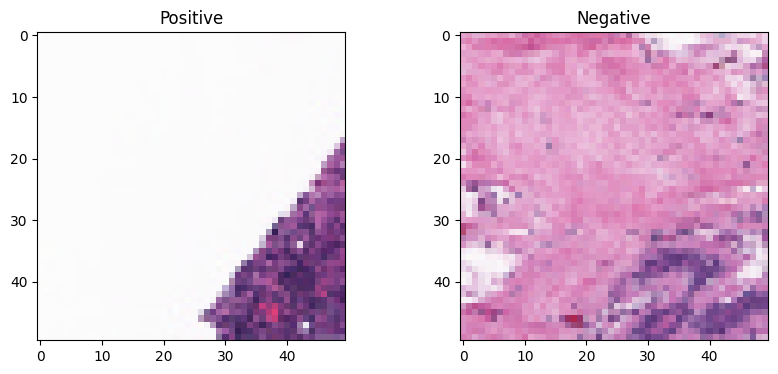

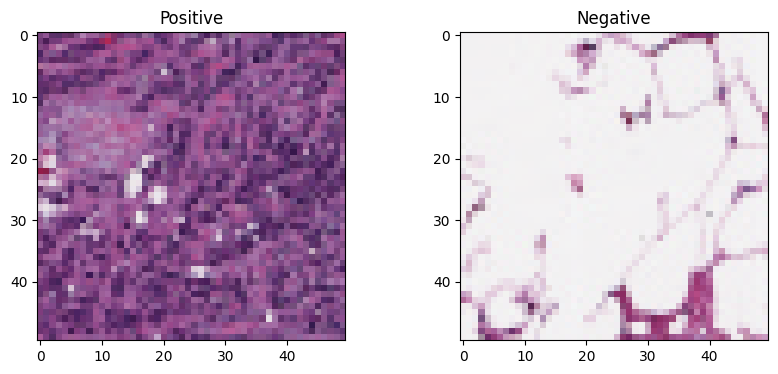

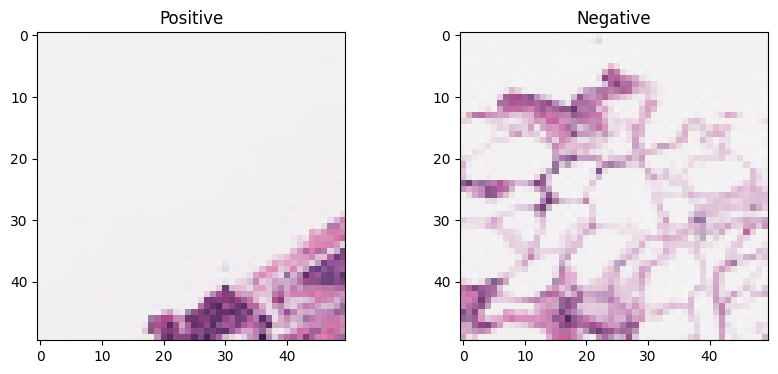

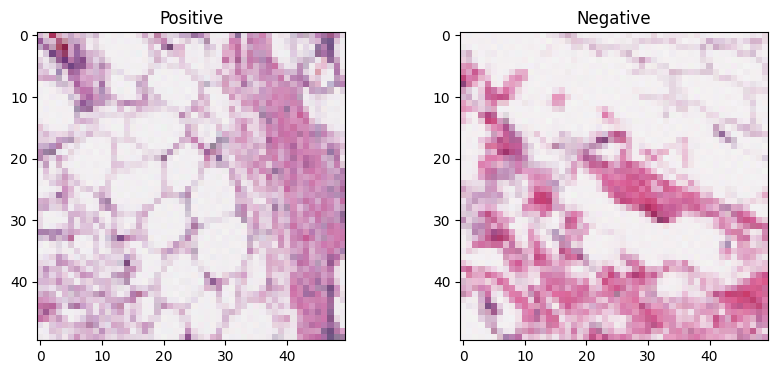

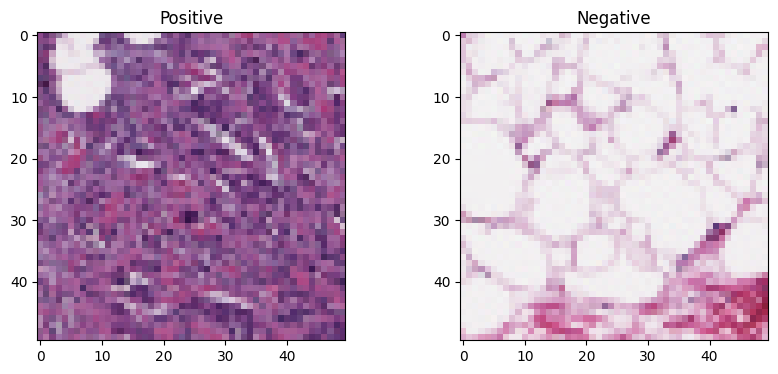

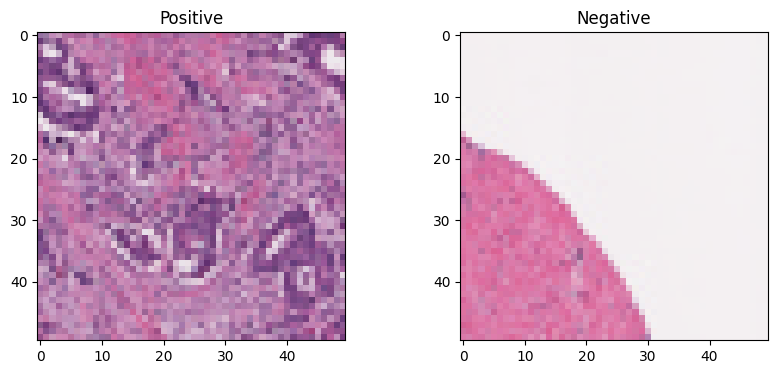

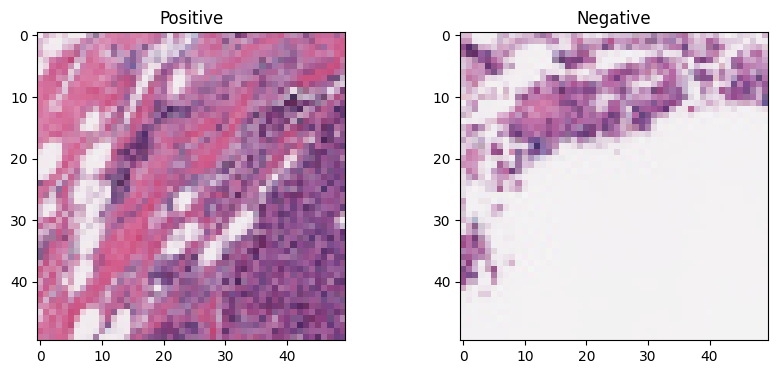

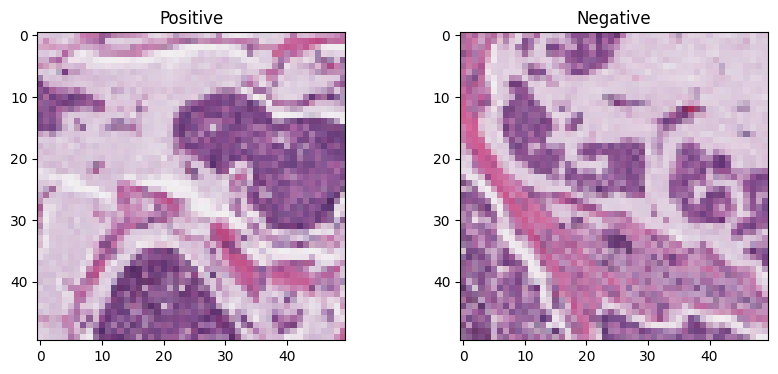

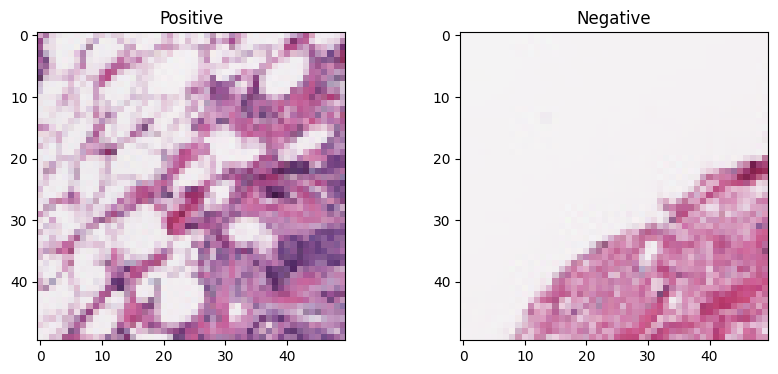

In [ ]:
for i in range(0, 9):
    person = patient[i]
    pos_path = f"{current_map}/{person}/1"
    neg_path = f"{current_map}/{person}/0"
    pos_file = f"{pos_path}/{os.listdir(pos_path)[0]}"
    neg_file = f"{neg_path}/{os.listdir(neg_path)[0]}"
    im1 = Image.open(pos_file)
    im2 = Image.open(neg_file)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    # Make the barplot with the predictions
    ax[0].imshow(im1)
    ax[1].imshow(im2)
    # Rotate the x-axis labels by 90 degrees
    ax[0].set_title('Positive')
    ax[1].set_title('Negative')

    plt.show()

In [ ]:
im3 = Image.open("idc_regular/9176/1/9176_idx5_x1101_y1801_class1.png")
im3.size